In [1]:
!nvidia-smi

Mon May 12 05:21:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d samuelcortinhas/apples-or-tomatoes-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification
License(s): CC0-1.0


In [5]:
!unzip /content/apples-or-tomatoes-image-classification.zip

Archive:  /content/apples-or-tomatoes-image-classification.zip
  inflating: test/apples/img_p1_111.jpeg  
  inflating: test/apples/img_p1_121.jpeg  
  inflating: test/apples/img_p1_127.jpeg  
  inflating: test/apples/img_p1_131.jpeg  
  inflating: test/apples/img_p1_133.jpeg  
  inflating: test/apples/img_p1_139.jpeg  
  inflating: test/apples/img_p1_14.jpeg  
  inflating: test/apples/img_p1_143.jpeg  
  inflating: test/apples/img_p1_15.jpeg  
  inflating: test/apples/img_p1_16.jpeg  
  inflating: test/apples/img_p1_29.jpeg  
  inflating: test/apples/img_p1_30.jpeg  
  inflating: test/apples/img_p1_33.jpeg  
  inflating: test/apples/img_p1_34.jpeg  
  inflating: test/apples/img_p1_36.jpeg  
  inflating: test/apples/img_p1_50.jpeg  
  inflating: test/apples/img_p1_52.jpeg  
  inflating: test/apples/img_p1_55.jpeg  
  inflating: test/apples/img_p1_68.jpeg  
  inflating: test/apples/img_p1_7.jpeg  
  inflating: test/apples/img_p1_70.jpeg  
  inflating: test/apples/img_p1_74.jpeg  
  infla

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [7]:
train_path = '/content/train'
valid_path = '/content/test'

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D

In [9]:
folders = glob('/content/train/*')
folders

['/content/train/tomatoes', '/content/train/apples']

In [10]:
num_of_class = len(folders)
num_of_class

2

In [11]:
# Create a Sequential model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, each of size 3x3,
# using 'valid' padding and ReLU activation function. Input shape is (224, 224, 3).
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)))

# Add a max pooling layer with pool size 2x2, stride of 2, and 'valid' padding.
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Add another 2D convolutional layer with 64 filters, each of size 3x3,
# using 'valid' padding and ReLU activation function.
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))

# Add a max pooling layer with pool size 2x2, stride of 2, and 'valid' padding.
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Add another 2D convolutional layer with 128 filters, each of size 3x3,
# using 'valid' padding and ReLU activation function.
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))

# Add a max pooling layer with pool size 2x2, stride of 2, and 'valid' padding.
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten the output from the convolutional layers to a 1D array
model.add(Flatten())

# Add a fully connected dense layer with 128 neurons and ReLU activation function.
model.add(Dense(128, activation='relu'))

# Add another fully connected dense layer with 64 neurons and ReLU activation function.
model.add(Dense(64, activation='relu'))

# Add a final output layer with 1 neuron and sigmoid activation function for binary classification.
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# view the structure of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,177,281 (42.64 MB)

 Trainable params: 11,177,281 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compiles the model with specified parameters:
# - Loss function: 'binary_crossentropy' is chosen for binary classification tasks,
#   where the model predicts a probability distribution over two classes.
# - Optimizer: 'adam' is an adaptive learning rate optimization algorithm that's
#   well-suited for training deep neural networks.
# - Metrics: ['accuracy'] evaluates the model's performance during training and
#   testing based on the classification accuracy, which measures the proportion
#   of correct predictions.
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Import the ImageDataGenerator class from TensorFlow's Keras preprocessing module.
# This class is used to generate batches of tensor image data with real-time data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object for training data with several augmentations:
# - rescale = 1./255: Normalizes the pixel values to the range [0, 1] by dividing by 255.
# - shear_range = 0.2: Applies random shear transformations (slanting the image).
# - zoom_range = 0.2: Randomly zooms inside images by up to 20%.
# - horizontal_flip = True: Randomly flips images horizontally to make the model invariant to direction.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create an ImageDataGenerator object for test/validation data with only rescaling:
# - rescale = 1./255: Normalizes the pixel values to [0, 1] range.
# No augmentation is applied here to ensure evaluation is done on unmodified data.
test_datagen = ImageDataGenerator(rescale=1./255)


In [15]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 294 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 97 images belonging to 2 classes.


In [17]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 837ms/step - accuracy: 0.4589 - loss: 0.7518 - val_accuracy: 0.6804 - val_loss: 0.6294
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 319ms/step - accuracy: 0.6607 - loss: 0.6216 - val_accuracy: 0.6701 - val_loss: 0.6139
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step - accuracy: 0.6814 - loss: 0.6115 - val_accuracy: 0.6495 - val_loss: 0.6303
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step - accuracy: 0.7201 - loss: 0.5937 - val_accuracy: 0.6701 - val_loss: 0.6397
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step - accuracy: 0.7006 - loss: 0.5776 - val_accuracy: 0.6804 - val_loss: 0.5124
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 345ms/step - accuracy: 0.7614 - loss: 0.5102 - val_accuracy: 0.6186 - val_loss: 0.6751
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 320ms/step - accuracy: 0.6833 - loss: 0.5734 - val_accuracy: 0.7216 - val_loss: 0.4960
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - accuracy: 0.6955 - loss: 0.5922 - val_accuracy: 

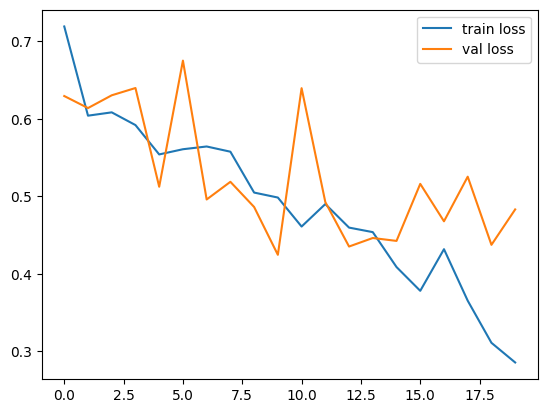

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

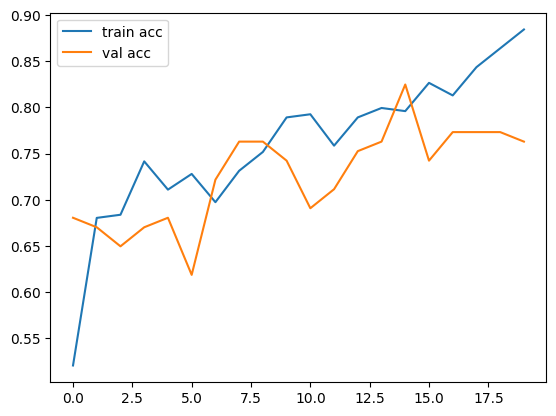

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
model.evaluate(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7666 - loss: 0.4800


[0.4831317663192749, 0.7628865838050842]

In [21]:
model.save('model.h5')

In [22]:
from tensorflow.keras.models import load_model

In [23]:
model = load_model("model.h5")

In [24]:
from tensorflow.keras.preprocessing import image

In [32]:
img=image.load_img('/content/images (1).jpg',target_size=(224,224))

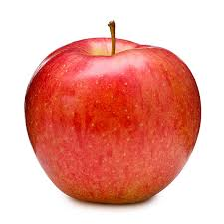

In [33]:
img

In [34]:
import numpy as np

In [35]:
x=image.img_to_array(img)
x=x/255

x=np.expand_dims(x,axis=0)
output = model.predict(x)
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.46547997]]


In [36]:
x.shape

(1, 224, 224, 3)

In [37]:
output[0][0]

np.float32(0.46547997)

In [38]:
if output[0][0] >=0.5:
    prediction = 'Tomato'
    print(prediction)
else:
    prediction = 'Apple'
    print(prediction)

Apple
